In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('fashion-mnist_train.csv')
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
matrix = []
row = df.iloc[12]
for i in range(28):
    temp = []
    for j in range(28):
        pixel_index = i * 28 + j  # correct mapping
        temp.append(int(row[pixel_index]))
    matrix.append(temp)

/var/folders/py/y2bppccd7zs0hq9wgxbwqmlm0000gn/T/ipykernel_2431/240075137.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  temp.append(int(row[pixel_index]))


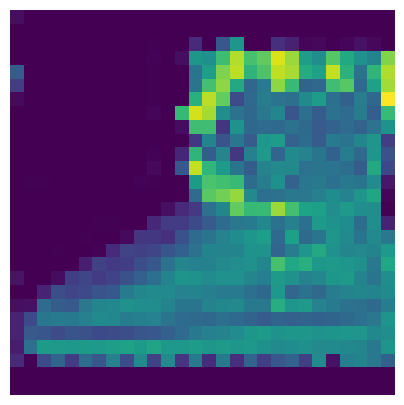

In [4]:
plt.figure(figsize=(5,5))
plt.imshow(matrix)
plt.axis('off')  # remove axis
plt.show()

In [5]:
#we have 
X = df.iloc[:,1:]
y = df.iloc[:,:1]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.25)

In [7]:
#scaling
X_train = X_train/255
X_test = X_test/255

In [8]:
from torch.utils.data import Dataset, DataLoader

In [9]:
class MyDataset (Dataset):
    def __init__(self, features, labels):
        features = features.to_numpy()
        labels = labels.to_numpy()
        self.features = torch.tensor(features, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.long)
    
    def __len__(self):
        return len(self.features)
    
    def __getitem__(self,index):
        return self.features[index], self.labels[index]

In [10]:
train_dataset = MyDataset(X_train, y_train)
test_dataset = MyDataset(X_test, y_test)

In [11]:
train_loader = DataLoader(train_dataset, 32, shuffle=True)
test_loader = DataLoader(test_dataset, 32, shuffle=True)

In [12]:
#nn
class myNN (nn.Module):
    def __init__(self, num_features):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(in_features=num_features, out_features=128),
            nn.ReLU(),
            nn.Linear(in_features=128, out_features=32),
            nn.ReLU(),
            nn.Linear(in_features=32, out_features=10),
            nn.Softmax()
        )

    def forward(self, x):
        return self.model(x)

In [13]:
learning_rate = 0.1
epochs = 10

In [14]:
model = myNN(X_train.shape[1])

In [15]:
criterion = nn.CrossEntropyLoss()

In [16]:
optim = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [17]:
for epoch in range(epochs):
    total_loss = 0
    for batch_feature, batch_label in train_loader:
        #forward pass
        out = model(batch_feature)
        #loss
        loss = criterion(out, batch_label.squeeze())
        #back pass
        optim.zero_grad()
        loss.backward()
        #update grad
        optim.step()

        total_loss += loss.item()

    print(f'Epoch: {epoch+1} ------ Loss: {total_loss}')

        

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/torch/nn/modules/module.py:1773: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Epoch: 1 ------ Loss: 2681.9933898448944
Epoch: 2 ------ Loss: 2366.7383580207825
Epoch: 3 ------ Loss: 2324.2018336057663
Epoch: 4 ------ Loss: 2309.1286479234695
Epoch: 5 ------ Loss: 2295.846404194832
Epoch: 6 ------ Loss: 2285.7613917589188
Epoch: 7 ------ Loss: 2279.989718437195
Epoch: 8 ------ Loss: 2275.0585235357285
Epoch: 9 ------ Loss: 2268.9317536354065
Epoch: 10 ------ Loss: 2266.1338690519333


In [18]:
#evaluation mode
model.eval()

myNN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=10, bias=True)
    (5): Softmax(dim=None)
  )
)

In [19]:
total = 0
correct = 0

with torch.no_grad():
    for batch_feature, batch_label in test_loader:
        output = model(batch_feature)
        _, predict = torch.max(output, 1)

        total += batch_label.shape[0]
        correct += (predict == batch_label).sum().item()

print("Correct predictions:", correct)
print("Total samples:", total)
print("Accuracy:", correct / total)

Correct predictions: 58040
Total samples: 15000
Accuracy: 3.8693333333333335
